In [1]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

data_prefix = 'xxx'

In [2]:
colors = {
    'asgd': 'darkred',
    'adadelta': 'red',
    'adagrad': 'orange',
    'adam': 'chocolate',
    'adamax': 'yellow',
    'lamb': 'lime',
    'rmsprop': 'seagreen',
    'sgd': 'teal',
    'rprop': 'purple'
}
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip().lower() if isinstance(x, str) else x
    return df.applymap(trim_strings)

In [3]:
log_files   = glob(f'../checkpoints/{data_prefix}_*/_log.csv')
log_content = [pd.read_csv(log_file, header=None, names=['method', 'optimizer', 'n_epoch', 'epoch', 'loss_train', 'loss_test', 'psnr_train', 'psnr_test', 'time_train', 'time_test', 'Empty' ]) for log_file in log_files]
log_content = pd.concat(log_content)
log_content = trim_all_columns(log_content)
log_content = log_content.drop('Empty', axis=1)
log_content.head()

,method,optimizer,n_epoch,epoch,loss_train,loss_test,psnr_train,psnr_test,time_train,time_test
0,fsrcnn,adadelta,10,1,0.320056,0.179316,5.259010,14.927637,5.111026,0.014008
1,fsrcnn,adadelta,10,2,0.319506,0.178987,5.423147,14.943552,4.989191,0.010002
2,fsrcnn,adadelta,10,3,0.318955,0.178637,5.183261,14.960557,5.087365,0.012001
3,fsrcnn,adadelta,10,4,0.318360,0.178257,5.233179,14.979044,5.006985,0.013003
4,fsrcnn,adadelta,10,5,0.317712,0.177847,5.463772,14.999076,4.978133,0.014000


In [4]:
def draw_digram(column_name, limits):
    report = column_name
    methods = log_content.groupby('method').size().to_frame('cnt').reset_index()
    for idm,row in methods.iterrows():
        method = row.method
        plt.xlabel('epoch')
        plt.ylabel(report)
        plt.title(f'Method: {method}')

        optimizer = log_content[log_content.method == row.method].groupby(['optimizer']).size().reset_index()
        for ido, rowo in optimizer.iterrows():
            selected_row = log_content[(log_content.method == row.method) & (log_content.optimizer == rowo.optimizer)]
            start_point  = 0
            end_point    = len(selected_row)
            color        = colors[rowo.optimizer.strip()]
            
            plt.plot(selected_row[report], color)
            
            limit = [start_point, end_point]
            limit.append(limits[0])
            limit.append(limits[1])
            plt.axis(limit)
        plt.legend(labels=optimizer.optimizer)

        plt.show()

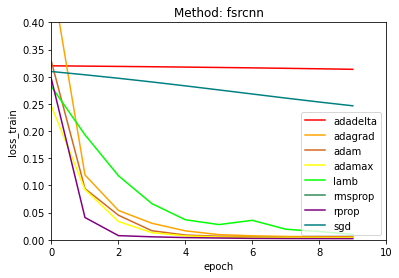

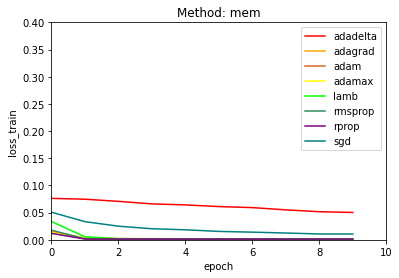

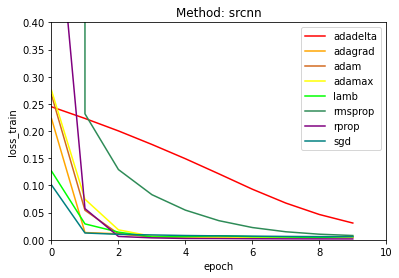

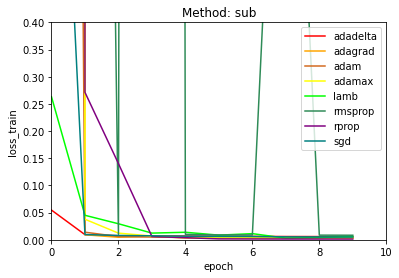

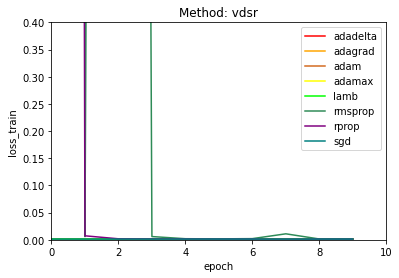

In [63]:
draw_digram('loss_train', [0, 0.4])

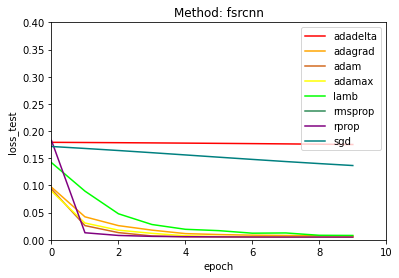

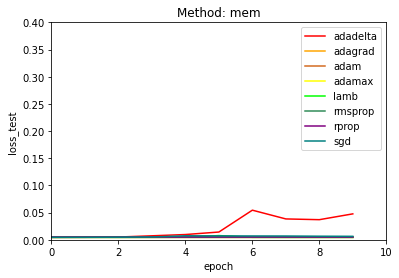

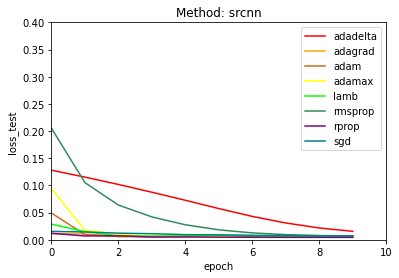

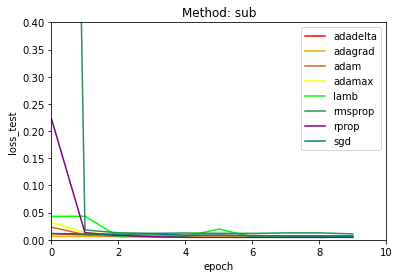

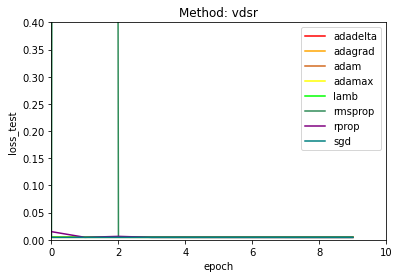

In [106]:
draw_digram('loss_test', [0, 0.4])

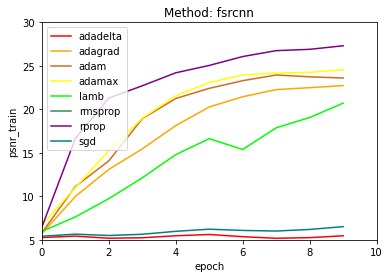

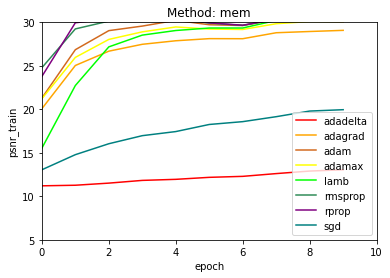

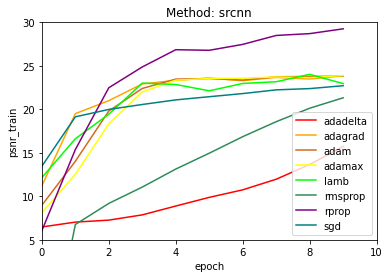

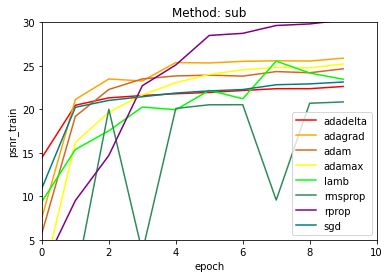

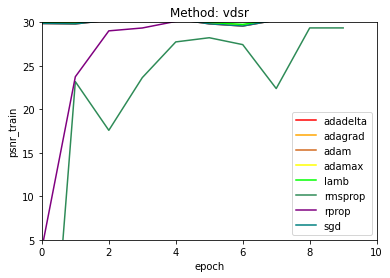

In [111]:
draw_digram('psnr_train', [5, 30])